# Decision Trees and Random Forest

## Introduction
Decision Trees and Random Forests are powerful supervised learning algorithms used for classification and regression tasks.

- **Decision Tree:** A tree-like model where each internal node represents a decision on an attribute, branches represent possible outcomes, and leaves represent the final prediction.
- **Random Forest:** An ensemble learning method that builds multiple decision trees and merges their predictions for improved accuracy and robustness.

---
## 1. Definition of Decision Tree
A **Decision Tree** is a predictive model that maps observations about data to conclusions about target values. It is structured like a tree where:
- Each **internal node** represents a decision based on an attribute.
- Each **branch** represents an outcome of a decision.
- Each **leaf node** represents a class label or regression value.

### Key Components
1. **Root Node** – The starting point of the tree containing the entire dataset.
2. **Decision Nodes** – Internal nodes that split the dataset based on feature values.
3. **Leaves** – The terminal nodes representing the outcome/classification.
4. **Splitting** – The process of dividing nodes into two or more sub-nodes.
5. **Pruning** – The process of removing branches to prevent overfitting.
6. **Gini Impurity / Entropy** – Metrics to determine the quality of a split.

---
## 2. Usage of Decision Trees
Decision Trees are widely used for:
- **Classification Tasks** – Assigning categories to inputs (e.g., spam detection, loan approval).
- **Regression Tasks** – Predicting continuous values (e.g., house price estimation).
- **Feature Selection** – Identifying important features in datasets.
- **Rule Extraction** – Providing easy-to-interpret decision rules.

### Advantages
- Simple to understand and visualize.
- Requires little data preprocessing.
- Handles both numerical and categorical data.

### Disadvantages
- Prone to overfitting if not pruned.
- Can be sensitive to noisy data.
- May not perform well on very complex datasets.

---
## 3. Random Forest
A **Random Forest** is an ensemble of multiple decision trees trained on different subsets of data. It improves accuracy and reduces overfitting by averaging the predictions of multiple trees.

### Why Use Random Forest?
- Increases accuracy by reducing variance.
- Works well with large datasets.
- More resistant to overfitting compared to a single decision tree.

### Key Components of Random Forest
1. **Bagging (Bootstrap Aggregating)** – Randomly selecting subsets of data to train each tree.
2. **Feature Randomness** – Each tree considers only a subset of features when splitting.
3. **Majority Voting** – The final classification is based on the most common prediction from all trees.

---
## Conclusion
- **Decision Trees** are useful for interpretable models but can overfit.
- **Random Forests** enhance accuracy and robustness by combining multiple trees.
- Use Decision Trees for explainability and Random Forest for better generalization.

# Iris Dataset 🌸
<ul>
  <li> <b>Use Case:</b> Classify different species of flowers based on sepal/petal length and width. </li>
  <li><b>Features</b>Sepal length, sepal width, petal length, petal width </li>
</ul>

## Import Necesary Modules:

In [37]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Task 1: Explore the Dataset

### Check for null values within the data set

In [6]:
data.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [9]:
data['target'].value_counts()

,count
target,
0.0,50
1.0,50
2.0,50


In [10]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Task 2: Performing visualization

In [11]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


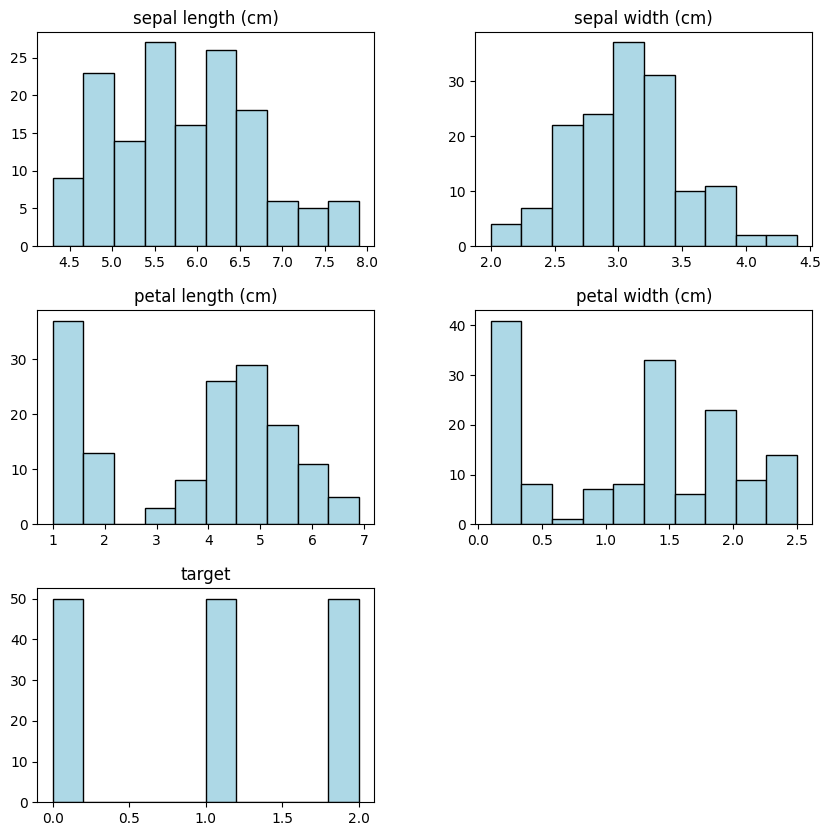

In [14]:
data.hist(figsize=(10,10), grid = False, edgecolor ='black', color = 'lightblue')
plt.show();

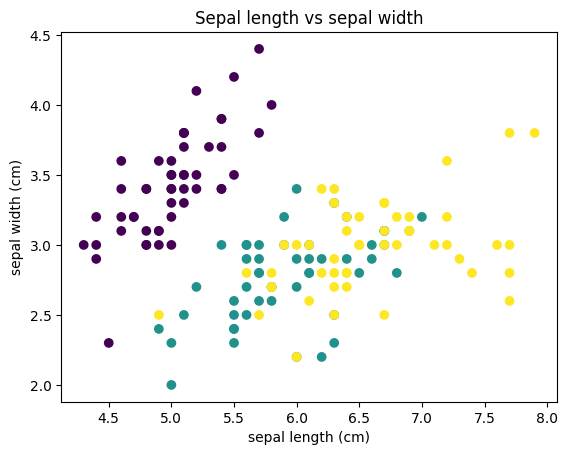

In [18]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=data['target'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Sepal length vs sepal width')
plt.show()

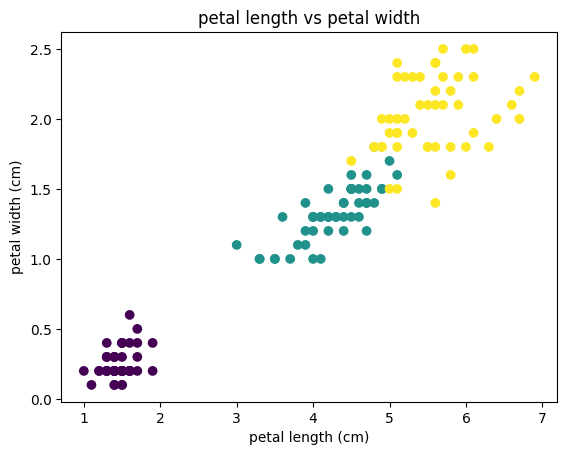

In [19]:
plt.scatter(data['petal length (cm)'], data['petal width (cm)'], c=data['target'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('petal length vs petal width')
plt.show();

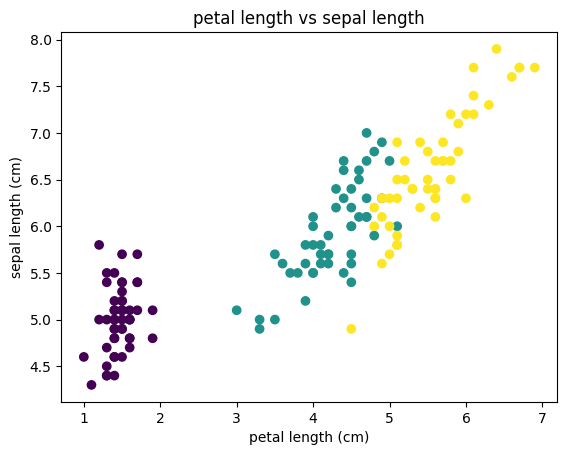

In [21]:
plt.scatter(data['petal length (cm)'], data['sepal length (cm)'], c=data['target'])
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.title('petal length vs sepal length')
plt.show();

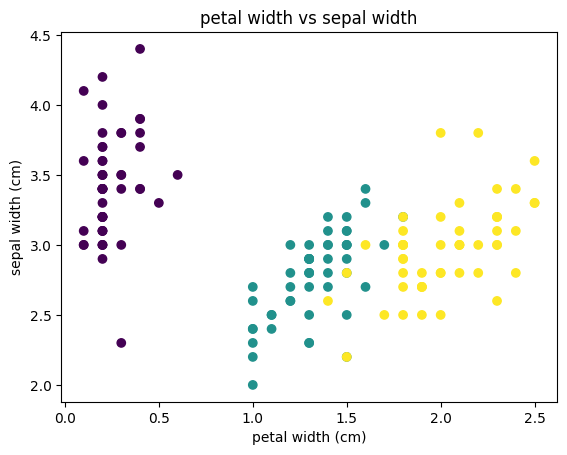

In [22]:
plt.scatter(data['petal width (cm)'], data['sepal width (cm)'], c=data['target'])
plt.xlabel('petal width (cm)')
plt.ylabel('sepal width (cm)')
plt.title('petal width vs sepal width')
plt.show();

## Task 3 Using Decision Tree to train the model


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
model = DecisionTreeClassifier(random_state= 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
y_pred = model.predict(X_test)

### Model Accuracy

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


### Classification report and confusion matrix

In [42]:
classfication = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Classification Report:\n", classfication)
print("Confusion Matrix:\n", cm)

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### Plotting Decision Tree

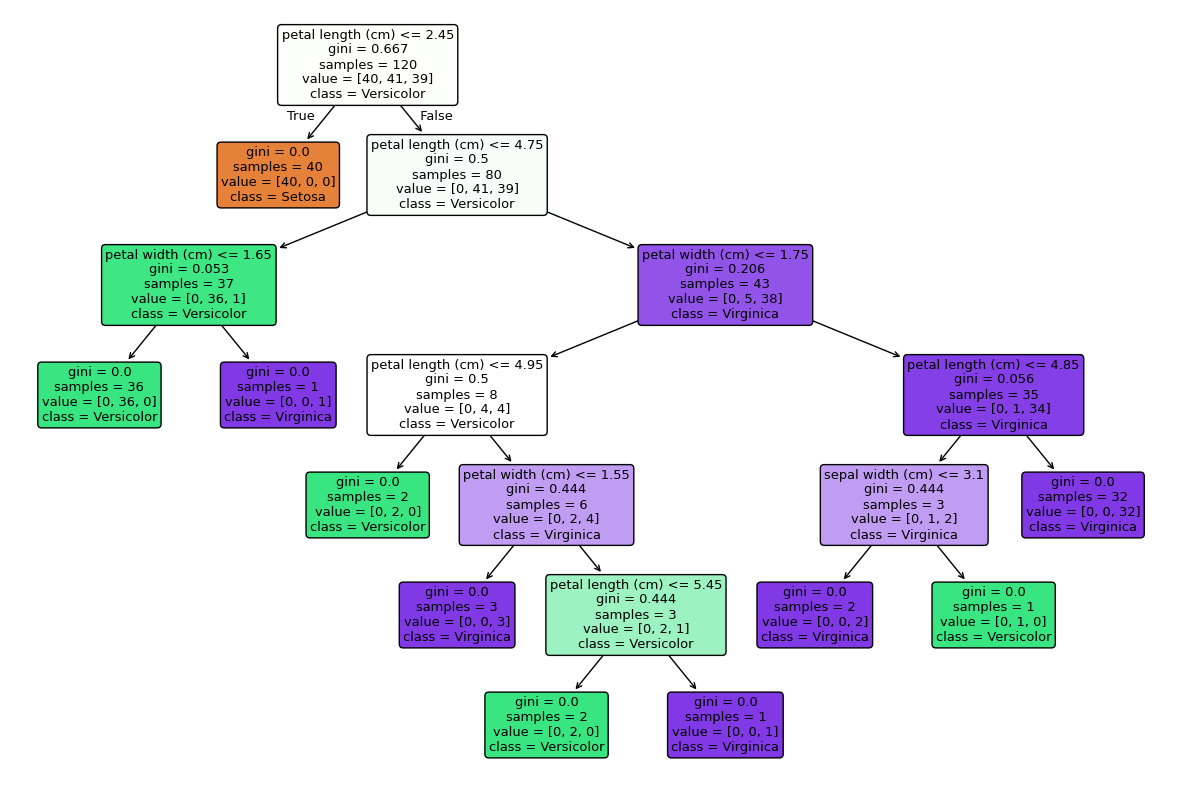

In [43]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=['Setosa', 'Versicolor', 'Virginica'], filled=True, rounded=True)
plt.show();

### Plotting Confusion Matrix

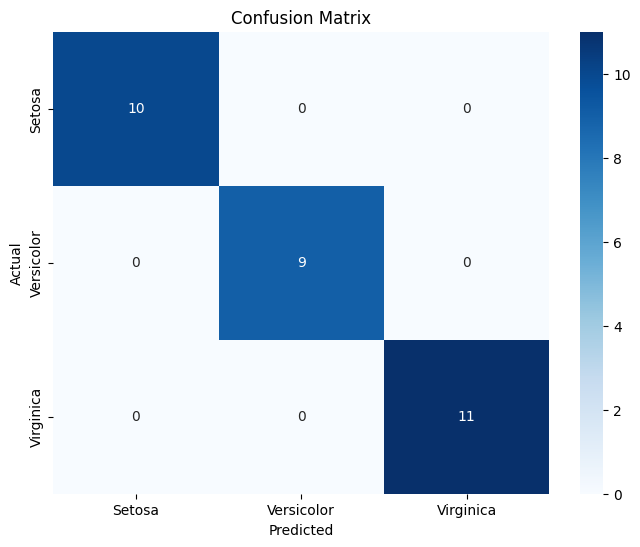

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()